In [1]:
from celery.app.utils import Settings
import uuid
import redis
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.spiders import CrawlSpider, Rule
from scrapy.linkextractors import LinkExtractor
from urllib.parse import urlparse
from multiprocessing import Process
from flask import abort

class crawlImages(CrawlSpider):
    rules = (
        # Extract and follow all links!
        Rule(link_extractor = LinkExtractor(), callback='parse', follow=True, process_request='process_request'),
    )     

    def make_requests_from_url(self, url):
        """A method that receives a URL and returns a Request object (or a list of Request objects) to scrape. 
        This method is used to construct the initial requests in the start_requests() method, 
        and is typically used to convert urls to requests.
        """
        return scrapy.Request(url, dont_filter=True, meta = {'start_url': url})
    
    def parse(self, response):
        self.log('crawling: {}'.format(response.url))
        raw_image_urls = response.xpath(".//img/@src").getall()
        clean_image_urls = []
        for img_url in raw_image_urls:
            clean_image_urls.append(response.urljoin(img_url))
        yield {'image_urls': clean_image_urls, 
              'start_url': response.meta['start_url']}

    def process_request(self, request, originating_response):
        request.meta['start_url'] = originating_response.meta['start_url']
        return request

class RedisPipeline(object):  
    @classmethod 
    def from_crawler(cls, crawler): 
        return cls() 

    def open_spider(self, spider): 
        self.client = redis.Redis(host='localhost', port=6379, db=0)

    def close_spider(self, spider): 
        pass

    def process_item(self, item, spider): 
        key = 'result_'+item['start_url']
        self.client.lpush(key, *item['image_urls'])
        return item

ITEM_PIPELINES = {
   RedisPipeline: 600,
}

2021-09-21 16:46:31 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-09-21 16:46:31 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.8.10 (default, Jun  2 2021, 10:49:15) - [GCC 9.4.0], pyOpenSSL 20.0.1 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 3.4.8, Platform Linux-4.4.0-19041-Microsoft-x86_64-with-glibc2.29
2021-09-21 16:46:31 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2021-09-21 16:46:31 [scrapy.crawler] INFO: Overridden settings:
{'DEPTH_LIMIT': 1,
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, '
               'like Gecko) Chrome/34.0.1847.131 Safari/537.36'}
2021-09-21 16:46:31 [scrapy.extensions.telnet] INFO: Telnet Password: 0399a5b9a97fd46a
2021-09-21 16:46:31 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.ex

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/#orb-modules 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/weather 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignori

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-scotland-highlands-islands-58624724 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/news/uk 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58638224 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58643717 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58634106 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58637094 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58632681 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dep

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/africa 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in-pictures-58564426 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in-pictures-58558932 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58553594 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worldserviceradio 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/ 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/world-58645947 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https:/

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58634106#main-heading 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/business-58634106 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58620167 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58090533 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58619418 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58627325 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58642139 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58634730 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58637116 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ig

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58643717#footer-navigation 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/search 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/music 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/schedules/p00fzl9m 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/weather 
2021-09-21 16:46:32 [

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58632145 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58639538 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58643787 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-northamptonshire-58642224 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:32 [scrapy.spidermiddleware

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/stories 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58638224#product-navigation-more-menu 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment_and_arts 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/health 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dept

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:32 [second_spider] DEBUG: crawling: https://www.bbc.com/news/business-58632681
2021-09-21 16:46:32 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/business-58632681>
{'image_urls': ['https://ichef.bbci.co.uk/news/976/cpsprodpb/7885/production/_120635803_gettyimages-1234710304.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/106C7/production/_120417276_image0.png', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/4113/production/_120595661_gettyimages-1340560679.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/06BB/production/_120632710_antractica1-129.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/FE31/production/_120637056_p09whz8w.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/153CC/production/_120588968_mediaitem120588967.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/B917/produ

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/economy 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-33712313 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/global_car_industry 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/business_of_sport 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/can-i-share-things-from-the-bbc 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/business-58620167 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/business-58090533 
2021-09-21 16:46:32 [scrapy.spi

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/music 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/schedules/p00fzl9m 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/weather 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58632681#product-navigation-menu 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/coronavirus 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-56837908 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https:/

2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-50068132 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628323 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/20039682 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:32 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/using

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/careers/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytmediakit.com/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.tbrandstudio.com/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/cookie-policy#how-do-i-manage-trackers 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893428-Terms-of-service 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893968-Terms-of-sale 
2021-09-21 16:46:33 [scrapy.spidermidd

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/weather 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.dep

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58186978 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58599462 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58558674 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58587699 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58571353 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58502189 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58488489 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/the_reporters 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/scotland 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/scotland/scotland_politics 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer/guidance 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-41670342 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbcglobalnews.com/home/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cooki

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/privacy/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/guidance 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.b

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.researchgate.net/publication/346624447_Endophytes_dominate_fungal_communities_in_six-year-old_veteranisation_wounds_in_living_oak_trunks 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.researchgate.net/publication/351344867_The_effects_of_veteranisation_of_Quercus_robur_after_eight_years 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://naturebftb.co.uk/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.ancienttreeforum.org.uk/ancient-trees/ancient-tree-ecology-wildlife/fungi/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.ancienttreeforum.co.uk/ancient-trees/ancient-tree-ecology-wildlife/fungi/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://fu

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210805-the-search-for-the-worlds-largest-methane-sources 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210727-how-to-boost-biodiversity-and-attract-wildlife-to-your-home 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210720-europes-museum-of-living-fossils 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210713-the-beavers-returning-to-the-desert 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210706-how-flooded-coal-mines-could-heat-homes 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58594732#product-navigation-more-menu 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment_and_arts 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/health 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dep

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer/guidance 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-41670342 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbcglobalnews.com/home/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cooki

2021-09-21 16:46:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-11428889#skip-to-content 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-11428889 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ign

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-57899572 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58479148 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58501172 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-57914432 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58050387 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58260533 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58055140 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/guidance 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/sitemap/> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/privacy/privacy-policy> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:33 [scrapy.core.engine] DEBUG: Crawled (20

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage#after-dfp-ad-top 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage#site-content 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage#site-index 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Editions&pgtype=Homepage 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Editions&pgtype=Homepage 
202

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#wall-street-looks-to-rebound-from-its-worst-day-since-may 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#elizabeth-holmes-theranos-trial-updates 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/us/politics-news/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/us/spending-debt-ceiling-congress.html 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/2

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/books/lena-waithe-gillian-flynn-zando-books.html 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/realestate/washington-dc-combining-two-houses-into-one.html 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/sports/baseball/anthony-gose-cleveland.html 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1022555-chicken-steam-roast 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1022565-pepperoni-pasta-with-lemon-and-garlic 
2021-09-21 16:46:33 [scrapy.spidermiddl

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1851/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1852/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1853/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1854/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1855/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1914/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1915/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1916/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1917/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1918/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1919/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1920/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap

2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1980/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1981/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1982/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1983/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1984/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1985/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/1986/ 
2021-09-21 16:46:33 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap

2021-09-21 16:46:34 [second_spider] DEBUG: crawling: https://www.bbc.com/news/world/asia
2021-09-21 16:46:34 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/world/asia>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?&col=1&from=p&ptag=js&s=598253&p=unknown&x2=[responsive]&x3=[bbc_website]&x4=[en]&x7=[index-section]&x8=[reverb-3.3.0-nojs]&x11=[news_gnl]&x12=[news]', 'https://ichef.bbci.co.uk/news/490/cpsprodpb/C110/production/_120642494_hi070690047.jpg', 'https://ichef.bbci.co.uk/news/490/cpsprodpb/C110/production/_120642494_hi070690047.jpg', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gi

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy#how-is-my-information-transferred-internationally 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy#what-is-our-legal-basis 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy#links-to-third-party-services 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy#how-are-changes-to-this-privacy-policy-communicated 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy#how-can-you-contact-us-who-is-the-controller-of-your-personal-information 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/asia#core-navigation 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/coronavirus 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-56837908 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/10462520 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/us_and_canada 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58603119 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58583212 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/can-i-share-things-from-the-bbc 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-58639895 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/correspondents/soutikbiswas?intlink_from_url=&link_location=live-reporting-undefined 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-politics-58639215 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/crosswords 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription/games?campaignId=4QHQ8 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/enter-email?redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fpuzzles%2Fvertex&response_type=cookie&client_id=games&application=crosswords&asset=navigation-bar 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/crosswords/game/daily 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/puzzles/stats 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/crosswords/game/mini 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG

2021-09-21 16:46:34 [second_spider] DEBUG: crawling: https://www.bbc.com/future/article/20210914-how-sea-otters-help-fight-climate-change
2021-09-21 16:46:34 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/future/article/20210914-how-sea-otters-help-fight-climate-change>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?&col=1&from=p&ptag=js&s=598253&p=future-planet::premium_future-planet::future.article.20210914-how-sea-otters-help-fight-climate-change.page&x2=[responsive]&x3=[bbc_website]&x4=[en]&x7=[article]&x8=[reverb-3.3.0-nojs]&x11=[FEATURE_SITES_GNL]&x12=[GNL_FUTURE]', 'https://ychef.files.bbci.co.uk/976x549/p09vy83m.jpg', 'https://ychef.files.bbci.co.uk/976x549/p09vy8q6.jpg', 'https://ychef.files.bbci.co.uk/976x549/p09vy90p.jpg', 'https://sb.scorecardresearch.com/p?c1=2&c2=17986528&cs_ucfr=0&cv=2.0&cj=1'], 'start_url': 'https://www.bbc.com/'}
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-09

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:34 [second_spider] DEBUG: crawling: https://www.nytimes.com/privacy/cookie-policy
2021-09-21 16:46:34 [scrapy.core.scraper] ERROR: Error processing {'image_urls': [], 'start_url': 'https://www.nytimes.com/ca/'}
Traceback (most recent call last):
  File "/home/alice/prj/mim_interview/flaskvenv/lib/python3.8/site-packages/twisted/internet/defer.py", line 858, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/home/alice/prj/mim_interview/flaskvenv/lib/python3.8/site-packages/scrapy/utils/defer.py", line 150, in f
    return deferred_from_coro(coro_f(*coro_args, **coro_kwargs))
  File "/tmp/ipykernel_21204/2500476825.py", line 51, in process_item
    self.client.lpush(ke

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/politics 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/nyregion 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/business 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/opinion 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/technology 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/science 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/health 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dep

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/cdc-coronavirus-vaccine.html 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/biden-democrats.html 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/ezra-klein-podcast-leslie-reagan.html 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/covid-politics.html 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/gender-pronouns-they.html 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/joe-manchin-coal-climate-biden.html 
2021-09-21 16:46:34 [scrapy.spidermiddleware

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/guides/how-to-clean-mattress/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/about/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-media-streamers/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/puzzles/spelling-bee 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/crosswords 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription/games 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/puzzles/letter-boxed 
2021-09-21 16:46:34 [scrapy.spidermiddleware

2021-09-21 16:46:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/wirecutter/about/> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:34 [second_spider] DEBUG: crawling: https://www.nytimes.com/puzzles/tiles
2021-09-21 16:46:34 [scrapy.core.scraper] ERROR: Error processing {'image_urls': [], 'start_url': 'https://www.nytimes.com/ca/'}
Traceback (most recent call last):
  File "/home/alice/prj/mim_interview/flaskvenv/lib/python3.8/site-packages/twisted/internet/defer.py", line 858, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/home/alice/prj/mim_interview/flaskvenv/lib/python3.8/site-packages/scrapy/utils/defer.py", line 150, in f
    return deferred_from_coro(coro_f(*coro_args, **coro_kwargs))
  File "/tmp/ipykernel_21204/2500476825.py", line 51, in process_item
    self.client.lpush(key, *item['image_urls'])
  File "/home/alice/prj/mim_interview/flaskvenv/lib/python3.8/site-packages/redis/client.py", line 1961, in lpush


2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-portable-generator/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-cordless-stick-vacuum/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-compost-bins/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-noise-cancelling-headphones/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-kids-face-masks/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/where-to-buy-n95-kn95-masks-online/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.dept

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/large-appliances/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/small-appliances/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/storage/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/tools-kitchen-dining/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/wine-bar/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/appliances/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/authors/joanne-chen/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?text=How%20to%20Clean%20Your%20Mattress%20%7C%20Wirecutter&url=https://www.nytimes.com/wirecutter/guides/how-to-clean-mattress/&via=wirecutter 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://facebook.com/sharer/sharer.php?u=https://www.nytimes.com/wirecutter/guides/how-to-clean-mattress/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/out/link/15285/133559/4/123713/?merchant=Bed%20Bath%20%26%20Beyond 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/out/link/10479/29508/4/123714/?merchant=Amazon 
2021-09-21 16:46:34 [scrapy.spidermidd

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/#main 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/seg/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/your-saved-items/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/gst/signout?redirect_uri=https://www.nytimes.com/wirecutter/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-laptop-under-500/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-air-purifier/ 


2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/sleep/advice/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/baking/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/coffee/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/cookware/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-dining/entertaining/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/kitchen-di

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/cars/accessories-auto/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/adult/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/money/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/money/managing-money/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/money/shopping/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/deals/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/blog/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/out/link/14026/140308/4/75492/?merchant=Walmart 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/gifts/best-gifts-toys-for-1-year-olds/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/gifts/best-gifts-for-4-year-olds/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/gifts/best-toys-gifts-for-3-year-olds/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-kids-water-bottles/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-picnic-table-camp-stove/ 
2021-09-21 16:46:34 [scrapy.spi

2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/money/cozy-selfcare-deals/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/money/amazing-weekend-deals/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/money/labor-day-mattress-deals/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/money/rei-labor-day-sale/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/lists/ 
2021-09-21 16:46:34 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/masthead/ 

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/networking/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/office/printers-scanners/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/projectors/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/home-garden/smart-home/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/smartphones/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/storage-devices/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/outdoors/swim/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/style/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/backpacks/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/bags/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/gear-travel/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/luggage/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewa

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/blog/online-coffee-subscriptions-we-love/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-coffee-maker/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/out/link/13071/0/4/75311/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-drip-coffee-maker/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/out/link/13071/0/4/114284/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://thewirecutter.com/wp-admin/post.php?post=221843&action=edit 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/projectors/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/home-garden/smart-home/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/smartphones/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/storage-devices/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/tablets/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/electronics/tvs/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/backpacks/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/bags/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/gear-travel/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/travel/luggage/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/health-fitness/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/health-fitness/cycling/ 
2021-09-21 16:46:35 [scr

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-carry-on-luggage/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-cloth-face-masks/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-wire-cutter/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/blog/worst-things-for-most-people/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/contact-details/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/blog/comparison-tables/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription/games?campaignId=9W9LL 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014755667-New-York-Times-Crossword 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription/games/gift 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/crosswords/apps 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/puzzles/submissions/crossword 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/NYTimesWordplay 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewa

2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-media-streamers/#main 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/seg/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/your-saved-items/ 
2021-09-21 16:46:35 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/gst/signout?redirect_uri=https://www.nytimes.com/wirecutter/reviews/best-media-streamers/ 
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.io

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/world/europe 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F21%2Fworld%2Feurope%2Fanne-sacoolas-harry-dunn.html%3Fsmid%3Dfb-share&name=Family%20of%20British%20Teen%20Reaches%20Settlement%20With%20U.S.%20D

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/world/africa/sudan-coup-attempt.html#after-top 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/world/africa/sudan-coup-attempt.html#after-sponsor 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/declan-walsh 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2019/04/11/world/africa/omar-bashir-sudan.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/08/22/world/africa/ethiopia-civil-war-spreads.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/12/05/world/africa/somalia-us-troops-withdraw.html 
2021-09-21 16:46:36 [scrapy.spide

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/nyregion/tessa-majors-luchiano-lewis.html#after-bottom 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014792127-Copyright-notice 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015385887-Contact-Us 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015727108-Accessibility 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/careers/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytmediakit.com/ 
2021-

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:36 [second_spider] DEBUG: crawling: https://www.nytimes.com/2021/09/21/world/asia/taliban-afghanistan-government-women.html
2021-09-21 16:46:36 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/2021/09/21/world/asia/taliban-afghanistan-government-women.html>
{'image_urls': ['https://static01.nyt.com/images/2021/09/21/world/21Afghanistan/merlin_195068085_6fec9f72-a2c5

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/14/arts/music/popcast-drake-certified-lover-boy.html#site-index 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/arts/music 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/world/canada/justin-trudeau-election-parliament.html#site-content 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/world/canada/justin-trudeau-election-parliament.html#site-index 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/world/canada 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.h

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893968-Terms-of-sale 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:36 [second_spider] DEBUG: crawling: https://www.nytimes.com/2021/09/21/technology/personaltech/apple-iphone13-r

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F02%2Ftheater%2Fbroadway-reopening-pandemic.html%3Fsmid%3Dfb-share&name=Inside%20Broadway%E2%80%99s%20Reopening%3A%20A%20Times%20Virtual%20Event&redirect_uri=https%3A%2F%2Fwww.facebook.com%2F 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1)

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/podcasts/the-daily/drone-strike-afghanistan-zemari-ahmadi.html#site-content 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/podcasts/the-daily/drone-strike-afghanistan-zemari-ahmadi.html#site-index 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/podcasts/the-daily 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultip

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015385887-Contact-Us 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015727108-Accessibility 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/careers/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytmediakit.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.tbrandstudio.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/cookie-policy#how-do-i-manage-trackers 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/business/china-evergrande-debt-protests.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/world/asia/afghan-girls-schools-taliban.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/world/un-general-assembly 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/world/asia/bts-un-performance.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.politico.com/news/magazine/2021/09/15/stolen-election-myth-gop-511988 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/covid-vaccine-verification.html 
2021-09-21 16:46:36

2021-09-21 16:46:36 [second_spider] DEBUG: crawling: https://www.nytimes.com/2021/09/21/science/how-humans-lost-their-tails.html
2021-09-21 16:46:36 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/2021/09/21/science/how-humans-lost-their-tails.html>
{'image_urls': ['https://static01.nyt.com/images/2021/09/21/science/21sci-tail1/21sci-tail1-articleLarge.jpg?quality=75&auto=webp&disable=upscale', 'https://static01.nyt.com/images/2018/06/12/multimedia/author-carl-zimmer/author-carl-zimmer-thumbLarge.png'], 'start_url': 'https://www.nytimes.com/ca/'}
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/science/how-humans-lost-their-tails.html#site-content 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/science/how-humans-lost-their-tails.html#site-index 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring lin

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Ftexas-abortion-provider.html%3Fsmid%3Dtw-share&text=How%20Texas%20Has%20Made%20My%20Job%20of%20Helping%20Women%20More%20Dangerous 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/texas-abortion-provider.html#after-top 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/texas-abortion-provider.html#after-sponsor 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.cdc.gov/mmwr/volumes/69/ss/ss6907a1.htm 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://janesdueprocess.org/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1)

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.smh.com.au/world/europe/g7-offers-rebuke-to-china-over-beijing-s-economic-coercion-campaign-against-australia-20210614-p580pe.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.lowyinstitute.org/the-interpreter/will-five-eyes-stare-down-china-s-economic-coercion 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.smh.com.au/politics/federal/illicit-gain-australia-accuses-china-of-criminal-cyber-attacks-20210720-p58b6s.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/article/us-australia-china-cyber-exclusive-idUSKBN1W00VF 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2019/11/28/world/australia/china-spying-wang-liqiang-nick-zhao.html 
2021-09-21 16:46:36 [s

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Fvaccine-kids-pfizer.html%3Fsmid%3Dfb-share&name=Why%20Covid%20Vaccines%20for%20Kids%20Are%20Taking%20So%20Long&redirect_uri=https%3A%2F%2Fwww.facebook.com%2F 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://api.whatsapp.com/send?text=Why%20Covid%20Vaccines%20for%20Kids%20Are%20Taking%20So%20Long%20https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Fvaccine-kids-pfizer.html%3Fsmid%3Dwa-share 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Fvaccine-kids-pfizer.html%3Fsmid%3Dtw-share&text=Why%20Covid%20Vaccines%20for%20Kids%20Are%20Taking%20So%20Long 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.dept

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/fed-quantitative-easing.html#site-content 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/fed-quantitative-easing.html#site-index 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/opini

2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.youtube.com/watch?v=PKwIKJb3n74 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.youtube.com/watch?v=8QfsXUPghXk 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.youtube.com/watch?v=kI4PuPopzR4 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.youtube.com/watch?v=0eKOyI6l03Q 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.youtube.com/watch?v=2_i0uvsyTPg 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://web.archive.org/web/20120907140019/http:/www.adultswim.com/blog/interviews/celeb-nerdy-norm-macdonald.html 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.youtube.com/watch?v=jJN9mBRX3uo&t=1s 


2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.instagram.com/gabspetito/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.instagram.com/bizarre_design_/ 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/us/gabby-petito-body-brian-laundrie.html?action=click&pgtype=Article&state=default&module=styln-petito&region=MAIN_CONTENT_1&context=STYLN_TOP_LINKS_recirc 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/us/who-is-gabrielle-petito.html?action=click&pgtype=Article&state=default&module=styln-petito&region=MAIN_CONTENT_1&context=STYLN_TOP_LINKS_recirc 
2021-09-21 16:46:36 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/us/brian-laundrie-gabrielle-petito-fiance.html?action=click&pgtype=Artic

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F21%2Ftravel%2Fmontserrat-vacation-coronavirus.html%3Fsmid%3Dtw-share&text=A%20Caribbean%20Island%E2%80%99s%20Audacious%20Tourism%20Experiment 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/news-event/coronavirus 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/world/covid-delta-variant-vaccine 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/covid-cases.html 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/09/14/us/covid-hospital-icu-south.html 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://api.whatsapp.com/send?text=America%20Is%20Being%20Held%20for%20Ransom.%20It%20Needs%20to%20Fight%20Back.%20https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Fransomware-biden-russia.html%3Fsmid%3Dwa-share 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Fransomware-biden-russia.html%3Fsmid%3Dtw-share&text=America%20Is%20Being%20Held%20for%20Ransom.%20It%20Needs%20to%20Fight%20Back. 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/ransomware-biden-russia.html#after-top 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/ransomware-biden-russia.html#after-sponsor 
2021-09-21 16:46:37 [scrapy.spide

2021-09-21 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/2021/09/21/opinion/cdc-coronavirus-vaccine.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/2021/09/21/opinion/gender-pronouns-they.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/2021/09/21/opinion/biden-democrats.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/2021/09/20/opinion/tenure-college-university.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/2021/09/21/opinion/covid-politics.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/2021/09/20/opinion/joe-manchin-c

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytmediakit.com/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.tbrandstudio.com/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/cookie-policy#how-do-i-manage-trackers 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893428-Terms-of-service 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893968-Terms-of-sale 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/ 
2021-09-21 16:46:37 [scrapy.spidermi

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/biden-democrats.html#site-index 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/opinion 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2Fwww.nytimes.com%

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Ftenure-college-university.html%3Fsmid%3Dtw-share&text=The%20Fight%20Over%20Tenure%20Is%20Not%20Really%20About%20Tenure 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/tenure-college-university.html#after-top 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/tenure-college-university.html#after-sponsor 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/molly-worthen 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.desmoinesregister.com/story/news/politics/2021/04/01/iowa-legislature-bill-ban-tenure-public-universities-professors-

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/covid-politics.html#site-content 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/covid-politics.html#site-index 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/opinion 
2021-09-21 16:

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://api.whatsapp.com/send?text=Dear%20Joe%20Manchin%3A%20Coal%20Isn%E2%80%99t%20Your%20State%E2%80%99s%20Future%20https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Fjoe-manchin-coal-climate-biden.html%3Fsmid%3Dwa-share 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F20%2Fopinion%2Fjoe-manchin-coal-climate-biden.html%3Fsmid%3Dtw-share&text=Dear%20Joe%20Manchin%3A%20Coal%20Isn%E2%80%99t%20Your%20State%E2%80%99s%20Future 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/joe-manchin-coal-climate-biden.html#after-top 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/joe-manchin-coal-climate-biden.html#after-sponsor 

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/generation-cancel-culture.html#site-content 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/generation-cancel-culture.html#site-index 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/o

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://api.whatsapp.com/send?text=We%E2%80%99re%20on%20the%20Precipice%20of%20a%20Post-Roe%20World%20https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F21%2Fopinion%2Fezra-klein-podcast-leslie-reagan.html%3Fsmid%3Dwa-share 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F21%2Fopinion%2Fezra-klein-podcast-leslie-reagan.html%3Fsmid%3Dtw-share&text=We%E2%80%99re%20on%20the%20Precipice%20of%20a%20Post-Roe%20World 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/ezra-klein-podcast-leslie-reagan.html#after-top 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/ezra-klein-podcast 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring

2021-09-21 16:46:37 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/interactive/2021/09/20/dining/24-easy-quick-dinner-recipes.html>
{'image_urls': ['https://static01.nyt.com/newsgraphics/2021/08/16/cooking-fast-flavor/assets/images/meatball_sub_5667-300.jpg', 'https://static01.nyt.com/newsgraphics/2021/08/16/cooking-fast-flavor/assets/images/toasted_coconut_rice_with_bok_choy_debdb830-300.jpg', 'https://static01.nyt.com/newsgraphics/2021/08/16/cooking-fast-flavor/assets/images/chickpea_stew_with_orzo_252-300.jpg', 'https://static01.nyt.com/newsgraphics/2021/08/16/cooking-fast-flavor/assets/images/sumac_roasted_fish_442-300.jpg', 'https://static01.nyt.com/newsgraphics/2021/08/16/cooking-fast-flavor/assets/images/herby_stovetop_chicken_320-300.jpg', 'https://static01.nyt.com/newsgraphics/2021/08/16/cooking-fast-flavor/assets/images/pulledchickenherbsalad_185-300.jpg', 'https://static01.nyt.com/newsgraphics/2021/08/16/cooking-fast-flavor/assets/images/broiledsalmon

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1022239-pineapple-marinated-chicken-breasts 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1019323-chepa-vepudu-fish-fry 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1019494-toasted-coconut-rice-with-bok-choy-and-fried-eggs 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1021902-braised-white-beans-and-greens-with-parmesan 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1018097-kimchi-fried-rice 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/recipes/1022314-meatball-subs 
2021-09-21 16:46:37 [sc

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/gail-collins 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/ross-douthat 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/maureen-dowd 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/thomas-l-friedman 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/michelle-goldberg 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/ezra-klein 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/column/nicholas-kristof 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Igno

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893968-Terms-of-sale 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/live/2021/09/21/business/business-sto

2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F21%2Fscience%2Fpudendum-women-anatomy.html%3Fsmid%3Dfb-share&name=Taking%20the%20%E2%80%98Shame%20Part%E2%80%99%20Out%20of%20Female%20Anatomy&redirect_uri=https%3A%2F%2Fwww.facebook.com%2F 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://api.whatsapp.com/send?text=Taking%20the%20%E2%80%98Shame%20Part%E2%80%99%20Out%20of%20Female%20Anatomy%20https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F21%2Fscience%2Fpudendum-women-anatomy.html%3Fsmid%3Dwa-share 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2F2021%2F09%2F21%2Fscience%2Fpudendum-women-an

2021-09-21 16:46:37 [second_spider] DEBUG: crawling: https://www.nytimes.com/2021/09/21/upshot/hospital-bills.html
2021-09-21 16:46:37 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/2021/09/21/upshot/hospital-bills.html>
{'image_urls': ['https://static01.nyt.com/images/2021/09/08/business/00up-nicu-bills1/merlin_194371236_8c926f27-00ad-4747-9a58-b405063b3674-articleLarge.jpg?quality=75&auto=webp&disable=upscale', 'https://static01.nyt.com/images/2020/08/25/reader-center/author-sarah-kliff/author-sarah-kliff-thumbLarge.png'], 'start_url': 'https://www.nytimes.com/ca/'}
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/upshot 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:37 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2F

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/matthew-haag 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/nicole-hong 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/09/15/nyregion/empire-state-building-reopening-new-york.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/08/03/nyregion/facebook-nyc-office-farley-building.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/10/13/nyregion/big-tech-nyc-office-space.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.wsj.com/articles/google-to-buy-new-york-city-office-building-for-2-1-billion-11632225600 
2021-09-21 16:46:38 [scrapy.sp

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#site-content 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#site-index 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3Fcampa

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/katie-robertson 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/neal-e-boudette 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#after-dfp-ad-mid3 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/business/dealbook/evergrande-stock-markets.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.billboard.com/articles/business/6874748/no-1-lucian-grainge-power-100 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.cnet.com/news/apple-strikes-iradio-deal-wit

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/interactive/2020/us/covid-hospitals-near-you.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/interactive/2021/us/cdc-mask-guidance-states.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/interactive/2020/science/coronavirus-vaccine-tracker.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:38 [second_spider] DEBUG: crawling: https://www.nytimes.com/2021/09/21/business/china-evergrande-bailout.html
2021-09-21 16:46:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/2021/09/21/business/china-evergrande-bailout.html>
{'image_urls': ['https://static01.nyt.

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/interactive/2021/us/south-carolina-covid-cases.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/interactive/2021/us/tennessee-covid-cases.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/interactive/2021/us/florida-covid-cases.html> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:38 [second_spider] DEBUG: crawling: https://www.nytimes.com/interactive/2020/us/covid-hospitals-near-you.html
2021-09-21 16:46:38 [scrapy.core.scraper] ERROR: Error processing {'image_urls': [], 'start_url': 'https://www.nytimes.com/ca/'}
Traceback (most recent call last):
  File "/home/alice/prj/mim_in

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/florida-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/georgia-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/hawaii-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/idaho-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/illinois-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/indiana-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: 

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/world/italy-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/world/mexico-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/world/spain-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/world/united-kingdom-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/science/coronavirus-vaccine-tracker.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/health/coronavirus-variant-tracker.html 
2021-09-21 16:46:38

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/us 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2Fwww.nytimes.com%2Finteractive%2F2021%2Fus%2Fcdc-mask-guidance-states.html%3Fsmid%3Dfb-share&name=See%20Mask%20Mandates%20and%20Guidance%20for%20Schools%20in%20Each%20State&redirect_uri

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/nebraska-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/nevada-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-hampshire-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-jersey-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-mexico-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-york-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/01/14/us/covid-19-death-toll.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/us/about-coronavirus-data-maps.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://github.com/nytimes/covid-19-data 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/cdc-mask-guidance-states.html#after-bottom 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014792127-Copyright-notice 
2021-09-21 16:46:38 [scrapy.spider

2021-09-21 16:46:38 [second_spider] DEBUG: crawling: https://www.nytimes.com/interactive/2021/us/south-carolina-covid-cases.html
2021-09-21 16:46:38 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/interactive/2021/us/south-carolina-covid-cases.html>
{'image_urls': ['https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/maps/USA-45/hotspots.png', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/maps/USA-45/vaccinations.png', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/maps/USA-45/risk_levels.png', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/maps/USA-45/cases.png', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/maps/USA-45/deaths.png', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/maps/USA-45/cases_percap.png', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/svg/timeseries/USA/USA-45-cases-two-wee

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://api.whatsapp.com/send?text=Coronavirus%20Vaccine%20Tracker%20https%3A%2F%2Fwww.nytimes.com%2Finteractive%2F2020%2Fscience%2Fcoronavirus-vaccine-tracker.html%3Fsmid%3Dwa-share 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2Finteractive%2F2020%2Fscience%2Fcoronavirus-vaccine-tracker.html%3Fsmid%3Dtw-share&text=Coronavirus%20Vaccine%20Tracker 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/news-event/coronavirus 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/world/covid-delta-variant-vaccine 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/covid-cases.html 
2021-09

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/ohio-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/oklahoma-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/oregon-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/pennsylvania-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/puerto-rico-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/rhode-island-covid-cases.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.d

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/health/pfizer-biontech-covid-19-vaccine.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/science/coronavirus-vaccine-tracker.html#moderna 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/health/moderna-covid-19-vaccine.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/science/coronavirus-vaccine-tracker.html#gamaleya 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/health/gamaleya-covid-19-vaccine.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/science/

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/05/10/health/pfizer-covid-vaccine-teens.html?smid=tw-nytimes&smtyp=cur 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.businesswire.com/news/home/20210920005452/en/Pfizer-and-BioNTech-Announce-Positive-Topline-Results-From-Pivotal-Trial-of-COVID-19-Vaccine-in-Children-5-to-11-Years 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/07/22/us/politics/pfizer-coronavirus-vaccine.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.businesswire.com/news/home/20210723005094/en/Pfizer-and-BioNTech-to-Provide-U.S.-Government-with-an-Additional-200-Million-Doses-of-COVID-19-Vaccine-to-Help-Meet-Continued-Need-for-Vaccine-Supply-in-the-U.S. 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://xk.usembassy.gov/coronavirus/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/malawimoh/posts/4098884300167054 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.lowyat.net/2021/241888/cansino-johnson-and-johnson-vaccines-get-conditional-approval-malaysian-children-to-get-stabbed-with-pfizer/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://timesofaddu.com/2021/03/15/breaking-sinopharm-pfizer-approved-for-use-in-maldives/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2020/12/11/world/covid-19-coronavirus/mexico-approves-pfizer-vaccine-for-emergency-use-and-other-news-around-the-world 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth 

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://investors.modernatx.com/news-releases/news-release-details/european-commission-purchases-additional-150-million-doses 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://investors.modernatx.com/news-releases/news-release-details/canada-exercises-increased-option-20-million-doses-mrna-vaccine 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://investors.modernatx.com/news-releases/news-release-details/moderna-partners-takeda-and-government-japan-supply-50-million 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://investors.modernatx.com/news-releases/news-release-details/moderna-announces-supply-agreement-ministry-public-health-supply 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://investors.modernatx.com/news-relea

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://investors.modernatx.com/news-releases/news-release-details/qatar-ministry-public-health-issues-emergency-use-authorization 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/business/healthcare-pharmaceuticals/saudi-arabia-approves-modernas-covid-vaccine-state-news-agency-2021-07-09/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.straitstimes.com/singapore/health/spore-approves-modernas-covid-19-vaccine-first-shipment-to-arrive-around-march 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/business/healthcare-pharmaceuticals/skorea-approves-modernas-covid-19-vaccine-2021-05-21/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.ft.lk/news/Approval-given-for-AstraZeneca-Pf

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bloomberg.com/news/articles/2021-09-02/china-s-own-mrna-covid-shot-expects-efficacy-data-by-year-end 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.biorxiv.org/content/10.1101/2020.09.03.280446v1 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://ir.arcturusrx.com/news-releases/news-release-details/arcturus-therapeutics-announces-it-has-initiated-dosing-its 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04668339 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.businesswire.com/news/home/20201109005459/en/Arcturus-Therapeutics-Announces-Positive-Interim-ARCT-021-LUNAR-COV19 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.koreaherald.com/view.php?ud=20210708000805 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.koreabiomed.com/news/articleView.html?idxno=9932 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04715997 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04915989?term=vaccine&recrs=adf&cond=COVID-19&phase=0123&sort=nwst&draw=2&rank=2 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.koreabiomed.com/news/articleView.html?idxno=11024 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.koreabiomed.com/news/articleView.html?idxno=11582 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignorin

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(21)00234-8/fulltext 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04713488 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://tass.com/society/1255865 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/05/06/world/sputnik-dose-virus.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6863/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04954092?term=vaccine&recrs=adf&cond=COVID-19&phase=0123&sort=nwst&draw=2&rank=3 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): 

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6514/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6456/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6915/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6499/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://tass.com/world/1253257 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6837/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6679/ 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://rdif.ru/Eng_fullNews/6539/ 
2021-09-21 16:46:38 

2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT05007275 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/12/30/world/europe/uk-covid-19-vaccine-oxford-astrazeneca.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/article/us-health-coronavirus-argentina-astrazen/argentine-regulator-approves-astrazeneca-oxford-covid-19-vaccine-astrazeneca-idUSKBN29421P 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/01/03/world/asia/india-covid-19-vaccine.html 
2021-09-21 16:46:38 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.astrazeneca.com/content/astraz/media-centre/press-releases/2021/astrazeneca-covid-19-vaccine-authorised-for-emergency-use-by-the-world-health-organization.html 
2021-09-21

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/02/26/world/canada-astrazeneca-vaccine.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.ispch.cl/noticia/isp-aprueba-la-tercera-vacuna-para-combatir-covid-19/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/article/us-health-coronavirus-colombia/colombia-approves-emergency-use-of-astrazeneca-coronavirus-vaccine-idUSKBN2AO01A 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://mg.usembassy.gov/u-s-citizen-services/security-and-travel-information/covid-19-information/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://qcostarica.com/costa-rica-approves-use-of-astrazenecas-covid-19-vaccine/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dept

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.livemint.com/news/world/sri-lanka-approves-oxford-astrazeneca-covid-19-vaccine-for-emergency-use-11611304254187.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.sknis.gov.kn/2021/06/09/st-kitts-and-nevis-will-only-use-who-approved-covid-19-vaccines-assures-pm-harris/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.unicef.org/press-releases/sudan-receives-first-delivery-covid-19-vaccines-over-800000-doses 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://health.gov.sr/actueel/2021/india-doneert-50000-doses-astrazeneca-dinsdag-kickoff-vaccinatie 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.aljazeera.com/news/2021/3/18/taiwan-clears-astrazeneca-vaccine-shots-might-start-on-monday 
2021-0

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/07/17/health/coronavirus-vaccine-johnson-janssen.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.jnj.com/johnson-johnson-announces-a-lead-vaccine-candidate-for-covid-19-landmark-new-partnership-with-u-s-department-of-health-human-services-and-commitment-to-supply-one-billion-vaccines-worldwide-for-emergency-pandemic-use 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.medrxiv.org/content/10.1101/2020.09.23.20199604v1 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/09/23/health/covid-19-vaccine-johnson-and-johnson.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.jnj.com/our-company/johnson-johnson-announces-its-first-phase-3-covid-19-vaccine-tr

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/world/middle-east/iran-approves-us-jj-covid-shot-fifth-wave-spreads-2021-09-16/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.kuna.net.kw/ArticleDetails.aspx?id=2980741&language=en 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.gob.mx/cofepris/articulos/cofepris-emite-autorizacion-para-uso-de-emergencia-a-vacuna-contra-covid-19-ad26-cov2-s-de-janssen-johnson-johnson?idiom=es 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/business/healthcare-pharmaceuticals/new-zealand-health-regulator-approves-use-janssen-covid-19-vaccine-2021-07-07/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://allafrica.com/stories/202105180601.html 
2021-09-21 16:46:39 [scrapy.spidermiddle

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04639466 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04977024 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://story.cision.com/r/3YFzSa 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2016/08/02/health/cancer-cell-therapy-immune-system.html?searchResultPosition=6 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.koreabiomed.com/news/articleView.html?idxno=9876 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://innovation.lgchem.com/newsroom/view.do 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.en24news.com/covid-19/en/2020/12

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04871737 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04830800 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/world/americas/brazil-oks-clinical-tests-homegrown-covid-vaccine-butanvac-2021-06-09/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04993209?term=vaccine&recrs=adf&cond=COVID-19&phase=0123&sort=nwst&draw=2&rank=1 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04776317 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nasdaq.com/articles/gritstone-bio-doses-first-volunteer-in-phase-1-trial-of-grt-r910-as

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.finlay.edu.cu/blog/soberana02-informe-de-eficacia-clinica-contra-la-enfermedad-sintomatica-covid-19-en-un-esquema-de-dos-dosis-cada-28-dias/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/05/12/world/cuba-vaccine.html?searchResultPosition=1 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.prensa-latina.cu/index.php?o=rn&id=425008&SEO=cuba-alista-100-millones-de-dosis-de-vacuna-anticovid-19 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.euronews.com/2021/01/21/cuba-aims-to-immunise-its-population-this-year-with-its-own-coronavirus-vaccine 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/02/17/world/americas/coronavirus-cuba-vaccine.html 
2021-09-21 16:

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/08/04/health/covid-19-vaccine-novavax.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7494251/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04533399 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/09/24/health/covid-19-vaccine-novavax.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.clinicaltrialsregister.eu/ctr-search/trial/2020-004123-16/GB 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://ir.novavax.com/news-releases/news-release-details/novavax-provides-phase-3-covid-19-vaccine-clinical-development 
2021-09-21 16:46:39 [scrapy.spid

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/07/31/health/covid-19-vaccine-sanofi-gsk.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.sanofi.com/en/media-room/press-releases/2020/2020-09-18-12-52-46 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.gsk.com/en-gb/media/press-releases/sanofi-and-gsk-sign-agreements-with-the-government-of-canada-to-supply-up-to-72-million-doses-of-adjuvanted-covid-19-vaccine/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.sanofi.com/en/media-room/press-releases/2020/2020-10-28-07-00-00 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2020/12/10/world/covid-19-coronavirus/sanofi-and-glaxosmithkline-delay-plans-for-a-trial-after-experimental-vaccine-fails-in-some-

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.voanews.com/covid-19-pandemic/who-urges-measures-stop-spread-covid-19-amid-vaccinations 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.irct.ir/trial/52975 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.tehrantimes.com/news/461417/Razi-Cov-Pars-enters-second-clinical-trial-phase 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://en.irct.ir/trial/55238 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.tehrantimes.com/news/463427/Cov-Pars-to-produce-1m-doses-of-vaccine-monthly 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.tehrantimes.com/news/464365/COVID-19-vaccine-Razi-Cov-Pars-starts-third-clinical-trial-phase 
2021-09-21 16:46:39 [scrapy

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.shionogi.com/global/en/news/2020/12/201216.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.japantimes.co.jp/news/2021/03/17/national/shionogi-vaccine/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.eubiologics.com/en/info/press_view.php?idx=13&page_number=1&mode=&cat=&search_gubun=all&search_keyword= 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04783311 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://eubiologics.com/kor/sub4_1_view.php?idx=92&page_number=1&mode=&search_gubun=all&search_keyword= 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04773665 
2021-09-21 16:46:39 [scrap

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.uq.edu.au/news/article/2020/08/uq-vaccine-scientists-report-positive-results-pre-clinical-testing 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3769210 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(21)00200-0/fulltext 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.abc.net.au/news/health/2021-04-26/university-queensland-covid-19-vaccine-research-molecular-clamp/100050240 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/05/07/business/economy/china-sinopharm-vaccine-who.html?action=click&module=RelatedLinks&pgtype=Article 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] 

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/article/health-coronavirus-mexico-sinopharm/mexico-grants-emergency-use-approval-to-chinas-sinopharm-covid-19-vaccine-idUSE1N2NR02D 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://mn.usembassy.gov/covid-19-information/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.wam.ae/en/details/1395302903753 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.ecns.cn/news/2021-02-18/detail-ihahrtqt2712371.shtml 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nasdaq.com/articles/nigeria-approves-sinopharm-covid-vaccine-expects-7.7-mln-doses-2021-08-24-0 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.rappler.com/nation/fda-grants-emergency-us

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.medrxiv.org/content/10.1101/2021.08.03.21261544v1 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04962308?term=vaccine&recrs=adf&cond=COVID-19&phase=0123&sort=nwst&draw=2&rank=2 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04992182?term=vaccine&recrs=adf&cond=COVID-19&phase=0123&sort=nwst&draw=2&rank=2 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/world/asia-pacific/malaysia-stop-using-sinovac-vaccine-after-supply-ends-minister-2021-07-15/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://covid-19pharmacovigilance.paho.org/sinovac#col-0 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/SuchitraElla/status/1395395197501009921 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://indianexpress.com/article/explained/covaxin-works-against-delta-plus-reading-the-findings-of-new-study-7435380/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.biorxiv.org/content/10.1101/2021.07.30.454511v1.abstract 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.reuters.com/world/india/brazil-suspends-import-permit-bharat-biotechs-covid-19-vaccine-2021-07-27/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://besafemoris.mu/general_news/covid-19-covaxin-receives-approval-of-national-covid-19-vaccination-committee/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1)

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.aa.com.tr/en/health/turkish-university-tests-covid-19-vaccine-candidate/2033228 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://bianet.org/english/health/235998-turkey-completes-phase-1-studies-of-domestic-covid-19-vaccine 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.dailysabah.com/turkey/turkey-aims-to-start-mass-vaccination-against-covid-19-by-friday/news 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://clinicaltrials.gov/ct2/show/NCT04824391?term=vaccine&recrs=adf&cond=COVID-19&phase=0123&sort=nwst&draw=2&rank=1 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.dailysabah.com/turkey/domestic-covid-19-jab-turkovac-begins-phase-3-trials-in-turkey/news 
2021-09-21 16:46:39 [scrapy.spidermiddl

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/us 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2Fwww.nytimes.com%2Finteractive%2F2021%2Fus%2Fsouth-carolina-covid-cases.html%3Fsmid%3Dfb-share&name=South%20Carolina%20Coronavirus%20Map%20and%20Case%20Count&redirect_uri=https%3A%2F%2F

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-jersey-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-mexico-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-york-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/north-carolina-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/north-dakota-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/ohio-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewa

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/darlington-south-carolina-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/chester-south-carolina-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/pickens-south-carolina-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/04/10/us/covid-prison-outbreak.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/01/14/us/covid-19-death-toll.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-m

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/tennessee-covid-cases.html#site-content 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/tennessee-covid-cases.html#site-index 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/us 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=mas

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/nebraska-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/nevada-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-hampshire-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-jersey-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-mexico-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/new-york-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares

2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/overton-tennessee-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/rhea-tennessee-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/van-buren-tennessee-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/macon-tennessee-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/carroll-tennessee-covid-cases.html 
2021-09-21 16:46:39 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/benton-tennessee-covid-cases.html 
20

2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/david-e-sanger 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/17/us/politics/us-france-australia-betrayal.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/08/09/climate/climate-change-report-ipcc-un.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/03/17/us/politics/us-china-relations.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/03/15/world/europe/coronavirus-inequality.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/michael-d-shear 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth 

2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/world/asia/australia-submarines-china.html#site-index 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/world/asia 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/dialog/feed?app_id=9869919170&link=https%3A%2F%2

2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/realestate#site-content 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/realestate#site-index 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/realestate 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:40 [scrapy.spidermiddlewa

2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/16/realestate/housing-market-near-nyc.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/slideshow/2021/09/16/realestate/on-the-market-in-new-york-city.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/slideshow/2021/09/16/realestate/on-the-market-in-the-new-york-region.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/15/realestate/house-hunting-in-scotland-a-unique-hybrid-in-the-highlands-for-2-7-million.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/slideshow/2021/09/15/realestate/arts-crafts-meets-swiss-flavor-in-scotland.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignor

2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/privacy-policy 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893428-Terms-of-service 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014893968-Terms-of-sale 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/ 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://h

2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/t-magazine#site-content 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/t-magazine#site-index 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/t-magazine 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/t-magazine#after-top 
2021-09-21 16:

2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/issue/t-magazine/2021/03/05/ts-march-7-mens-fashion-issue 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/issue/t-magazine/2021/02/05/ts-feb-21-womens-fashion-issue 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/t-magazine/past-issues.html 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/newsletters/t-list 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://pinterest.com/tmagazine 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/tmagazine 
2021-09-21 16:46:40 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://instagram.com/tmagazine 
2021-09-

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://api.whatsapp.com/send?text=Coronavirus%20in%20the%20U.S.%3A%20Latest%20Map%20and%20Case%20Count%20https%3A%2F%2Fwww.nytimes.com%2Finteractive%2F2021%2Fus%2Fcovid-cases.html%3Fsmid%3Dwa-share 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/intent/tweet?url=https%3A%2F%2Fwww.nytimes.com%2Finteractive%2F2021%2Fus%2Fcovid-cases.html%3Fsmid%3Dtw-share&text=Coronavirus%20in%20the%20U.S.%3A%20Latest%20Map%20and%20Case%20Count 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/news-event/coronavirus 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/world/covid-delta-variant-vaccine 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/oregon-covid-cases.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/pennsylvania-covid-cases.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/puerto-rico-covid-cases.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/rhode-island-covid-cases.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/south-carolina-covid-cases.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/south-dakota-covid-cases.html 
2021-09-21 16:46:41 [scrapy.spide

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/us/about-coronavirus-data-maps.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://github.com/nytimes/covid-19-data 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/sarah-almukhtar 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/aliza-aufrichtig 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/matthew-bloch 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/keith-collins 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/amy-harmon 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG:

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/magazine#site-content 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/magazine#site-index 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/magazine 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/magazine#after-top 
2021-09-21 16:46:41 [s

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/food#site-content 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/food#site-index 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/food 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: 

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/style#site-content 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/style#site-index 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/style 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBU

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:41 [second_spider] DEBUG: crawling: https://www.nytimes.com/ca/section/travel
2021-09-21 16:46:41 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/ca/section/travel>
{'image_urls': ['https://static01.nyt.com/images/2021/09/20/travel/travel-montserrat03/travel-montserrat03-jumbo.jpg', 'https://static01.nyt.com/images/2021/09/20/travel/20travel-india-myanmar-promo/merlin_188880870_f9c2e5b3-1313-413f-8c84-57a48bf4a8a2-videoLarge.jpg', 'https://static01.nyt.com/images/2021/09/17/travel/17allinclusive-clubmed/17allinclusive-cl

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/books 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/books#after-sponsor 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/arts 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014792127-Copyright-notice 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015385887-Contact-Us 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015727108-Accessibility 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/careers/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytmediakit.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.tbrandstudio.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignori

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/arts/television/2021-emmys.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/arts/television/emmy-winners-list.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/arts/anthony-johnson-dead.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/arts/television/fall-tv-season-new-shows.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/arts/dance/jojo-siwa-dancing-with-the-stars.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/theater/london-theater-covid.html 
2021-09-21 16:46:41 [scrapy.spi

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/15/travel/california-asian-history.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/14/travel/hostels-pandemic.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/16/travel/biden-airplanes-trains-executive-order.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/14/travel/transgender-woman-church.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/10/travel/help-were-going-to-europe-and-havent-a-clue-which-masks-to-pack.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/travel#after-mid1 
2021-09-21 16:

2021-09-21 16:46:41 [second_spider] DEBUG: crawling: https://www.nytimes.com/ca/section/sports
2021-09-21 16:46:41 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/ca/section/sports>
{'image_urls': ['https://static01.nyt.com/images/2021/09/15/sports/00nba-sharpe/00nba-sharpe-videoLarge-v2.jpg', 'https://static01.nyt.com/images/2021/09/15/sports/00nba-sharpe/00nba-sharpe-thumbStandard.jpg', 'https://static01.nyt.com/images/2021/09/19/sports/19nfl-wwl-belichick/merlin_194759178_bfabe303-cd2a-444a-9623-d534b2ea6248-videoLarge.jpg', 'https://static01.nyt.com/images/2021/09/19/sports/19nfl-wwl-belichick/19nfl-wwl-belichick-thumbStandard.jpg', 'https://static01.nyt.com/images/2021/09/20/sports/19running-newsletter-print/running-newsletter-tiktok-videoLarge.jpg', 'https://static01.nyt.com/images/2021/09/20/sports/19running-newsletter-print/running-newsletter-tiktok-thumbStandard.jpg', 'https://static01.nyt.com/images/2021/09/21/sports/21mlb-goseWEB1/merlin_195048324_6bae

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytimes.stats.com/golf/final.asp 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytimes.stats.com/tennis/scoreboard.asp 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/sports/basketball/nets-dayron-sharpe.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/sports/football/nfl-week-2-scores.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/19/sports/tik-tok-runner.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/sports/baseball/anthony-gose-cleveland.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/opinion#site-content 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/opinion#site-index 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/opinion#after-top 
2021-09-21 16:46:41 [scrapy.spidermiddlew

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/opinion#after-mid2 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/opinion#after-mktg 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014792127-Copyright-notice 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015385887-Contact-Us 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015727108-Accessibility 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/careers/ 
2021-09-21 1

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/17/technology/apple-employee-unrest.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/16/technology/digital-privacy.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/13/technology/apple-software-update-spyware-nso-group.html 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/technology#after-mid1 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/technology/personaltech 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/16/technology/personaltech/internet-privacy-chrome-safari.html 
2021-09-21 16:46:41 [scrapy.spide

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/health#site-content 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/health#site-index 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/health 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] D

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015385887-Contact-Us 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015727108-Accessibility 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/careers/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytmediakit.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.tbrandstudio.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/cookie-policy#how-do-i-manage-trackers 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/nyregion#site-content 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/nyregion#site-index 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/nyregion 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.de

2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/science#site-content 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/science#site-index 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/science 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://myaccount.nytimes.com/auth/login?response_type=cookie&client_id=vi&redirect_uri=https%3A%2F%2Fwww.nytimes.com%2Fsubscription%2Fmultiproduct%2Flp8KQUS.html%3FcampaignId%3D7JFJX&asset=masthead 
2021-09-21 16:46:41 [scrapy.spidermiddlewares.depth

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015385887-Contact-Us 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015727108-Accessibility 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/careers/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://nytmediakit.com/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.tbrandstudio.com/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/privacy/cookie-policy#how-do-i-manage-trackers 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/farnaz-fassihi 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/world/un-general-assembly#after-dfp-ad-mid2 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2020/11/30/world/americas/brazil-amazon-rainforest-deforestation.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/06/19/world/middleeast/ebrahim-raisi-iran-president.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/precious-fondren 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/by/ernesto-londono 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dept

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://usun.usmission.gov/remarks-by-ambassador-linda-thomas-greenfield-during-a-un-press-briefing-previewing-the-united-states-participation-and-priorities-for-unga76/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/globalnyc/status/1438269815685361676 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/07/03/world/americas/brazil-bolsonaro-vaccine-scandal.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115014792127-Copyright-notice 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytco.com/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us/articles/115015385887-Contac

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/business#stream-panel 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/business/autonation-mike-manley-chief-executive.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/business/fortune-alyson-shontell.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/us/politics/treasury-department-combating-ransomware-cryptocurrency.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/nyregion/google-buys-building-hudson-square.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/business/new-york-commercial

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ukrainian/news-58636462 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ukrainian/blogs-58597768 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ukrainian/press-review-58596752 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ukrainian/podcasts/p09jsy3h/p09w4zrt 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ukrainian/features-58586818 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ukrainian/features-58360575 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/ukrainian/features 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth

2021-09-21 16:46:42 [second_spider] DEBUG: crawling: https://www.nytimes.com/ca/section/politics
2021-09-21 16:46:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/ca/section/politics>
{'image_urls': ['https://static01.nyt.com/images/2021/09/20/us/politics/20dominion/merlin_180336687_9a5c9bb7-96c2-4e8b-a0a5-41b44fd642be-videoLarge.jpg', 'https://static01.nyt.com/images/2021/09/20/us/politics/20dominion/20dominion-thumbStandard.jpg', 'https://static01.nyt.com/images/2021/09/21/us/politics/21dc-power/21dc-power-videoLarge.jpg', 'https://static01.nyt.com/images/2021/09/21/us/politics/21dc-power/21dc-power-thumbStandard.jpg', 'https://static01.nyt.com/images/2021/09/20/us/politics/20dc-virus-travelban-1/20dc-virus-travelban-1-videoLarge.jpg', 'https://static01.nyt.com/images/2021/09/20/us/politics/20dc-virus-travelban-1/20dc-virus-travelban-1-thumbLarge.jpg', 'https://static01.nyt.com/images/2021/09/20/multimedia/20DC-Abortion-01/20DC-Abortion-01-videoLarge.jpg', 'h

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/sitemap/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Footer&pgtype=Homepage 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://help.nytimes.com/hc/en-us 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription?campaignId=37WXW 
2021-09-21 16:46:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://www.bbc.com/pashto> from <GET https://www.bbc.com/pashto/>
2021-09-21 16:46:42 [second_spider] DEBUG: crawling: https://www.bbc.com/turkce
2021-09-21 16:46:42 [scrapy.core.scraper] DEBU

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/turkce/spor-58620450 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/turkce/haberler-dunya-58615945 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/turkce/haberler-dunya-58492630 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/turkce/haberler-dunya-58393152 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/turkce/haberler-dunya-58242188 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/turkce/haberler-dunya-58158568 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/turkce/haberler-turkiye-42068713 
2021-09-21 16:46:42 [scrapy.spidermi

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/uzbek/central-asia-58584228 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/uzbek/uzbekistan-51462034 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/uzbek/uzbekistan-53638773 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/uzbek/uzbekistan-50219916 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/uzbek/uzbekistan-50043819 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/uzbek/49549478 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/uzbek/uzbekistan-39863216 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring li

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/53987979 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/habari-56222489 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/michezo-58634490 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/habari-58634286 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/live/habari-58634491?ns_mchannel=social&ns_source=twitter&ns_campaign=bbc_live&ns_linkname=6149d536c638c12396ae2256%26Mapinduzi%20yaliyotibuka%20Sudan%3A%20Serikali%20yawalaumu%20wandani%20wa%20Bashir%262021-09-21T13%3A04%3A54.905Z&ns_fee=0&pinned_post_locator=urn:asset:4d63cbef-789c-4734-ad26-3fa4824ebf04&pinned_post_asset_id=6149d536c638c12396ae2256&pinned_po

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/academy/sw/collections/language-usage-sw 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/habari-46650120 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/taasisi-49283417 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/taasisi-37098622 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/taasisi-37100009 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/swahili/taasisi-37100010 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cookies/ 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEB

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/tamil/global-58613816 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/tamil/india-58619376 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/tamil/science-58620926 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/tamil/business-58613725 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/tamil/global-58611584 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/tamil/global-58610845 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/tamil/india-58610106 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): ht

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/internacional-58631059 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/geral-58598748 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/brasil-58543745 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/geral-58552699 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/internacional-58514069 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/internacional-58481419 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/geral-58470002 
2021-09-21 16:46:42 [scrapy.spidermid

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/aprenda-ingles-58595090 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/aprenda-ingles-58518954 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/topics/cxndrr1qgllt 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/internacional-58311506 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/brasil-58288422 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/brasil-57523633 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/portuguese/podcasts/p07r3r3t 
2021-09-21 16:46:42 [scrap

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/russian/topics/c50nzm2dllnt 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/russian/news-58626733 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/russian/features-58619907 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/russian/live/news-58614590 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/russian/news-58629867 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/russian/media-58626139 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/russian/news-58620417 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link 

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sri-lanka-58477801 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/world-58596632 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sri-lanka-58600613 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/world-58573409 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sri-lanka-58593987 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sri-lanka-57891620 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sri-lanka-58592328 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ign

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/world-58381855 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/world-58400544 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/sinhala/sport 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sport-57757148 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sport-58147815 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sri-lanka-58067665 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sinhala/sport-57998024 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): ht

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/us#stream-panel 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/us/politics/trump-dominion-voting.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/us/house-democrats-executive-power.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/us/politics/treasury-department-combating-ransomware-cryptocurrency.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/us/spending-debt-ceiling-congress.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/us/politics/biden-unga.html 
2021-09-21 16:46:42 [scrapy

2021-09-21 16:46:42 [second_spider] DEBUG: crawling: https://www.bbc.com/somali
2021-09-21 16:46:42 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/somali>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?s=598342&s2=83&p=somali.page&x1=[urn%3Abbc%3Acps%3A37e54173-99e6-0722-e050-380a4e805645]&x2=[responsive]&x3=[news-somali]&x4=[so]&x7=[index-home]&x8=[simorgh-nojs]&x9=[Somali%2B-%2BBBC%2BNews%2BSomali]&x11=[2016-07-18T08%3A12%3A56.000Z]&x12=[2021-09-21T20%3A39%3A14.000Z]', 'https://ichef.bbci.co.uk/news/660/cpsprodpb/134D7/production/_120636097_25b6389e-7443-4c23-86d8-8d13609c676f.jpg'], 'start_url': 'https://www.bbc.com/'}
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali#content 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/s

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali/war-58621134 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali/war-58574089 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali/war-58574088 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali/war-58471949 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali/war-58410853 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali/war-58465178 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/somali/war-58381758 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.c

2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/world/asia/afghan-girls-schools-taliban.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/world/africa/hotel-rwanda-guilty.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/world/europe/skripal-arrest.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/section/world#after-mid1 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/spotlight/read-the-times-in-spanish 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/2021/09/21/espanol/espana-aborto-legal.html 
2021-09-21 16:46:42 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto#content 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/topics/cr50y57xj52t 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/topics/cz74k7wy49jt 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/topics/cxe2wdp2dv3t 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/topics/cr50y5rq23gt 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/topics/cr50y59q860t 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): 

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/institutional/2012/03/000001_frequencies 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/arts-and-literature-46787030 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.co.uk/academy/ps/ 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.co.uk/academy/ps/articles/art20160812150655171 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/institutional-49283007 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/institutional-37620701 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/pashto/institutional-37622761 
2021-09-21 16:4

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/#site-content 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/#site-index 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/?action=click&region=Editions&pgtype=Homepage 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Editions&pgtype=Homepage 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/ 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cn.nytimes.com 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring li

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/spotlight/elecciones-2020 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/2021/09/08/espanol/cocaina-fentanilo-sobredosis.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/2021/09/08/espanol/voto-california-newsom.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/2021/09/03/espanol/aborto-texas.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/2021/08/27/espanol/theranos-elizabeth-holmes.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/es/2021/08/20/espanol/afganistan-11-septiembre.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.de

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/nepali/media-54029171 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/nepali/media/video 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/nepali/news-58640830 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/nepali/news-58638020 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/nepali/news-58636036 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/nepali/news-58629656 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/nepali/news-58634551 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www

2021-09-21 16:46:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/japanese> (referer: https://www.bbc.com/)
2021-09-21 16:46:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/gahuza> (referer: https://www.bbc.com/)
2021-09-21 16:46:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.nytimes.com/> (referer: https://www.nytimes.com/ca/)
2021-09-21 16:46:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://www.bbc.com/zhongwen/simp> from <GET https://www.bbc.com/zhongwen/simp/>
2021-09-21 16:46:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://www.bbc.com/burmese> from <GET https://www.bbc.com/burmese/>
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper#site-content 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper#

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/17/books/review-peril-bob-woodward-robert-costa-trump-biden.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/movies/dear-evan-hansen-actors-sing.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/health/blind-pharmacies-access.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/09/science/sea-sponge-skeleton.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/section/todayspaper#after-mid5 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/todayspaper/quotation-of-the-day-painful-reminder-of-babys-death-257000

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/kyrgyz/sapartv 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/kyrgyz/sapar-tv-58320314 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/kyrgyz/sapar-tv-57904702 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/kyrgyz/world 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/kyrgyz/articles/cwqz7lwx1q5o 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/kyrgyz/articles/cwvzqxgzxj7o 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/kyrgyz/articles/c1j8qjxv4jko 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/marathi/international-58641437 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/marathi/india-55570692 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/marathi/india-58640982 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/marathi/international-58615879 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/marathi/india-58638120 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/marathi/india-58638125 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/marathi/india-58575543 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignorin

2021-09-21 16:46:43 [second_spider] DEBUG: crawling: https://www.nytimes.com/ca/?action=click&region=Editions&pgtype=Homepage
2021-09-21 16:46:43 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.nytimes.com/ca/?action=click&region=Editions&pgtype=Homepage>
{'image_urls': ['https://static01.nyt.com/images/2021/09/21/world/21hp-un-gen-assembly2-swap/21hp-un-gen-assembly2-swap-threeByTwoMediumAt2X-v4.jpg?format=pjpg&quality=75&auto=webp&disable=upscale', 'https://static01.nyt.com/images/2021/09/20/us/politics/20dominion/merlin_180336687_9a5c9bb7-96c2-4e8b-a0a5-41b44fd642be-threeByTwoSmallAt2X.jpg?format=pjpg&quality=75&auto=webp&disable=upscale', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/svg/timeseries/USA/USA-cases-two-weeks.svg', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/svg/timeseries/USA/USA-deaths-two-weeks.svg', 'https://static01.nyt.com/newsgraphics/2021/coronavirus-tracking/images/maps/USA/hotspots-state.png', '

2021-09-21 16:46:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://www.bbc.com/azeri> from <GET https://www.bbc.com/azeri/>
2021-09-21 16:46:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://www.bbc.com/arabic> from <GET https://www.bbc.com/arabic/>
2021-09-21 16:46:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/ws/languages> (referer: https://www.bbc.com/)
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Editions&pgtype=Homepage#after-dfp-ad-top 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Editions&pgtype=Homepage#site-content 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/?action=click&region=Editions&pgtype=Homepage#site-index 
2021-09-21 16:46:43 [scra

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#american-airlines-and-jetblue-face-a-federal-antitrust-suit-over-their-alliance 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#wall-street-looks-to-rebound-from-its-worst-day-since-may 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/live/2021/09/21/business/business-stock-market-news?type=styln-live-updates&label=business%20and%20economy%20updates&index=0#elizabeth-holmes-theranos-trial-updates 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/16/movies/andrew-garfield-tick-tick-boom.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/dining/shukette-restaurant-review.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/books/lena-waithe-gillian-flynn-zando-books.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/realestate/washington-dc-combining-two-houses-into-one.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/sports/baseball/anthony-gose-cleveland.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://cooking.nytimes.com/ 
2021-09-21 16:46:43 [scrapy.spide

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/section/opinion 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/section/technology 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/section/science 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/section/health 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/section/sports 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/section/arts 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/international/section/books 
2021-09-21

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/biden-democrats.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/ezra-klein-podcast-leslie-reagan.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/covid-politics.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/opinion/gender-pronouns-they.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/joe-manchin-coal-climate-biden.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/opinion/tenure-college-university.html 
2021-09-21 16:46:43 [scrapy.spidermiddlewa

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/about/ 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/wirecutter/reviews/best-media-streamers/ 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/puzzles/spelling-bee 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/crosswords 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/subscription/games 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/puzzles/letter-boxed 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/puzzles/tiles 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring li

2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/indonesia/dunia-58592794 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/indonesia/majalah-58595754 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/indonesia/dunia-58620139 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/indonesia/dunia-58567683 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/indonesia/indonesia-58596342 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/indonesia/majalah-58592804 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/indonesia/dunia-58614989 
2021-09-21 16:46:43 [scrapy.spidermiddlewares.depth] DEBUG: I

2021-09-21 16:46:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/arabic> (referer: https://www.bbc.com/)
2021-09-21 16:46:44 [second_spider] DEBUG: crawling: https://www.bbc.com/zhongwen/simp
2021-09-21 16:46:44 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/zhongwen/simp>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?s=598342&s2=38&p=zhongwensimp.page&x1=[urn%3Abbc%3Acps%3A426d2030-e2dc-5202-e050-380a4e80578d]&x2=[responsive]&x3=[news-zhongwen]&x4=[zh-Hans]&x7=[index-home]&x8=[simorgh-nojs]&x9=[%E4%B8%BB%E9%A1%B5%2B-%2BBBC%2BNews%2B%E4%B8%AD%E6%96%87]&x11=[2016-11-29T14%3A34%3A24.000Z]&x12=[2021-09-21T13%3A41%3A56.000Z]', 'https://ichef.bbci.co.uk/news/660/cpsprodpb/F4FE/production/_96281726_a7b80551-5e71-409e-a8ba-8be25b6c0e98.jpg'], 'start_url': 'https://www.bbc.com/'}
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] 

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen/simp/chinese-news-58497197 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen/simp/world-58584998 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen/simp/science-58545638 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen/simp/world-58513780 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen/simp/world-58568182 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen/simp/chinese-news-58500007 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/zhongwen/simp/world-58544585 
2021-09-21 16:46:44 [scra

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/pakistan-58633556 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/regional-58635146 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/science-58544513 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/sport-58634585 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/science-54644193 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/institutional-49282935 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/institutional-37588278 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dep

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/south-carolina-covid-cases.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/tennessee-covid-cases.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2021/us/cdc-mask-guidance-states.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/us/covid-hospitals-near-you.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/interactive/2020/science/coronavirus-vaccine-tracker.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/business/china-evergrande-bailout.html 
2021-09-21 16:46:44 [

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/climate/penguins-bee-stings.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/ca/#after-dfp-ad-mid2 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/21/well/live/covid-masks-protect.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/09/20/well/live/dry-eyes-relief.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2019/09/10/well/eat/seeking-an-obesity-cure-researchers-turn-to-the-gut-microbiome.html 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.nytimes.com/2021/02/10/well/move/running-body-evolution.html 
2021-09-21 16:46:44 [scrapy.spidermid

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/azeri 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/azeri#content 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/azeri/topics/c7zp571g7y7t 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/azeri/topics/czpveq9ll8pt 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/azeri/topics/cde15l4vn02t 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/azeri/media/video 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/azeri/region-58641064 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-58627155#content 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/america_latina 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/internacional 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/topics/c67q9nnn8z7t 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-36795069 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/topics/ca170ae3-99c1-48db-9b67-2866f85e7342 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignor

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/world-58645947#content 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/science-52004647 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/media-49522521 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/media/video 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-37434377 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-37434376 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (de

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/tv-and-radio-42414864 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/tv-and-radio-37728883 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/middleeast-58623142 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/middleeast-49419861 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/middleeast-46723441 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/world-58598732 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/world-58641487 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: I

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/trending-58618017 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/trending-58611770 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/trending-58597668 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/trending-58589127 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/art-and-culture-58598727 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/arabic/world-58550053 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/arabic/media-49522519 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring 

2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/regional-58640059 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/world-58641084 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/world-58641085 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/sport-58634585 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/pakistan-58633556 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/regional-58635146 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/urdu/science-58544513 
2021-09-21 16:46:44 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https:

2021-09-21 16:46:44 [second_spider] DEBUG: crawling: https://www.bbc.com/news/world-us-canada-58553594
2021-09-21 16:46:44 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/world-us-canada-58553594>
{'image_urls': ['https://ichef.bbci.co.uk/news/624/cpsprodpb/17B75/production/_105914179_blank_white_space-nc.png', 'https://ichef.bbci.co.uk/news/683/cpsprodpb/181E9/production/_120539789_gettyimages-1340128947.jpg', 'https://ichef.bbci.co.uk/news/624/cpsprodpb/17B75/production/_105914179_blank_white_space-nc.png', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/4E24/production/_120540002_tcmediumlandscape.jpg', 'https://ichef.bbci.co.uk/news/624/cpsprodpb/17B75/production/_105914179_blank_white_space-nc.png', 'https://ichef.bbci.co.uk/news/683/cpsprodpb/110A1/production/_120539796_gettyimages-1340129103.jpg', 'https://ichef.bbci.co.uk/news/624/cpsprodpb/17B75/production/_105914179_blank_white_space-nc.png', 'https://ichef.bbci.co.uk/news/683/cpsprodpb/164A8/production/_

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/NICKIMINAJ/status/1437526877808128000 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/NICKIMINAJ/status/1437532566945341441 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.cdc.gov/coronavirus/2019-ncov/vaccines/planning-for-pregnancy.html 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/cgv3jrrzrdqt 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/cx1m7zg05q3t 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58537575 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-585542

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/music 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/schedules/p00fzl9m 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/weather 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-africa-58582717#product-navigation-menu 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/coronavirus 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-56837908 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): htt

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in-pictures-58558932#main-heading 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/in-pictures-58558932 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www

2021-09-21 16:46:45 [second_spider] DEBUG: crawling: https://www.bbc.com/news/in-pictures-58564426
2021-09-21 16:46:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/in-pictures-58564426>
{'image_urls': ['https://ichef.bbci.co.uk/news/976/cpsprodpb/BFAC/production/_120586094_ce613d86-147d-4387-b666-3f94a8ed2c0f.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/24AC/production/_120588390_cd021028-b282-45c8-a140-4c9aee899da3.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/4BBC/production/_120588391_901aab7b-e051-46cd-a09d-e53f58f64a3b.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/718C/production/_120586092_c271d302-0e59-45f1-82d4-34ac91039911.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/989C/production/_120586093_a517fa06-772a-4c06-a995-28164b55d4cb.jpg'], 'start_url': 'https://www.bbc.com/'}
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.dept

2021-09-21 16:46:45 [second_spider] DEBUG: crawling: https://www.bbc.com/vietnamese
2021-09-21 16:46:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/vietnamese>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?s=598342&s2=97&p=vietnamese.page&x1=[urn%3Abbc%3Acps%3A3df2f586-7a4e-791d-e050-380a4e804347]&x2=[responsive]&x3=[news-vietnamese]&x4=[vi]&x7=[index-home]&x8=[simorgh-nojs]&x9=[Tin%2Bch%C3%ADnh%2B-%2BBBC%2BNews%2BTi%E1%BA%BFng%2BVi%E1%BB%87t]&x11=[2016-10-06T05%3A52%3A14.000Z]&x12=[2021-09-21T16%3A30%3A54.000Z]', 'https://ichef.bbci.co.uk/news/660/cpsprodpb/139F5/production/_120637308_alexander_litvinenko_getty.jpg'], 'start_url': 'https://www.bbc.com/'}
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese#content 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ig

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese/world-58599783 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese/vietnam-58559432 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese/vietnam-58515017 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese/forum-58503223 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese/forum-58395923 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese/vert-fut-58549252 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/vietnamese/world-58511502 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DE

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in-pictures-58585399#main-heading 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/in-pictures-58585399 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-57899572#main-heading 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/business-57899572 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.c

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-58600725 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58629132 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58588022 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58594732 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-africa-58604468 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife/article/20210916-why-inexperienced-workers-cant-get-entry-level-jobs 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58556777 
2021-09

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-america-latina-58639094 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-internacional-58640962 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-internacional-58634521 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-58639039 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-america-latina-58464987 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-internacional-58639037 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/noticias-america-latina

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/institucional-36400005 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/institucional-36400007 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/mundo/institucional-36400009 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cookies/ 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/send/u50853489 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cookies/how-does-the-bbc-use-cookies-for-advertising/ 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-0

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-58634685 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-58634680 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-58621114 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-58621120 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-58613764 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/persian/tv-and-radio-58613755 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/persian/blogs/viewpoints 
2021-09-21 16:46:45 [scrapy.spidermiddle

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58556777#main-heading 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/business-58556777 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58643717 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58632145 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58639538 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58643787 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-northamptonshire-58642224 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:45 [scrapy.spidermid

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment_and_arts 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/health 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/the_reporters 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/us

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/health-57888429#main-heading 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/health-57888429 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/w

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-58600725 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58629132 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58588022 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58594732 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-africa-58604468 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife/article/20210916-why-inexperienced-workers-cant-get-entry-level-jobs 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58556777 
2021-09

2021-09-21 16:46:45 [second_spider] DEBUG: crawling: https://www.bbc.com/news/science-environment-58561621
2021-09-21 16:46:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/science-environment-58561621>
{'image_urls': ['https://ichef.bbci.co.uk/news/64/cpsprodpb/3E76/production/_112909951_jonathanamos.jpg', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/10C64/production/_120580786_suited.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/18194/production/_120580789_nhghg.jpg', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/EA04/production/_120580995_badge.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/13824/production/_120580997_e_woedswyambzhq.jpg', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/18644/production/_120580999_arc.jpg', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/9B1C/production/_120580793_screenshot2021-09-15at23.04.22.png', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/127C4/production/_120561757_whatsubject.jpg', 'https://ichef.bbci.co.uk/news/6

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/ck3n449xwept 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/c5y915pwp89t 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/c4028d970e4t 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/cx1m7zg01xyt 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/cdq4wl4851yt 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/cvenzmgyww4t 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58642139 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Igno

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-scotland-58566334#footer-navigation 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/search 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/music 
2021-09-21 16:46:45 [scrapy.spide

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-northamptonshire-58642224 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-50068132 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628323 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/20039682 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dept

2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/the_reporters 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/market-data 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-45489065 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-15521824 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/companies 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-22434141 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-11428889 
2021-09-21 16:46:45 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 

2021-09-21 16:46:45 [second_spider] DEBUG: crawling: https://www.bbc.com/news/world-us-canada-58619393
2021-09-21 16:46:45 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/world-us-canada-58619393>
{'image_urls': ['https://ichef.bbci.co.uk/news/64/cpsprodpb/24B9/production/_112910490_jonsopel.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/C55A/production/_120622505_biden_976getty.jpg', 'https://ichef.bbci.co.uk/news/464/cpsprodpb/10301/production/_98950366_presentational_grey_line464-nc.jpg', 'https://ichef.bbci.co.uk/news/464/cpsprodpb/10301/production/_98950366_presentational_grey_line464-nc.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/11122/production/_120622996_emma_976getty.jpg', 'https://ichef.bbci.co.uk/news/976/cpsprodpb/2D02/production/_120622511_heathrow_976getty.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/106C7/production/_120417276_image0.png', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/4113/production/_120595661_gettyimages-1340560

2021-09-21 16:46:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/news/world-europe-58590187> (referer: https://www.bbc.com/)
2021-09-21 16:46:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/news/business-15521824> (referer: https://www.bbc.com/)
2021-09-21 16:46:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/news/business-58579833> (referer: https://www.bbc.com/)
2021-09-21 16:46:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/news/technology-58572389> (referer: https://www.bbc.com/)
2021-09-21 16:46:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/news/entertainment-arts-58636369> (referer: https://www.bbc.com/)
2021-09-21 16:46:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/news/science-environment-58608295> (referer: https://www.bbc.com/)
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/economy 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-33712313 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/global_car_industry 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/business_of_sport 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/live/world-africa-47639452?ns_mchannel=social&ns_source=twitter&ns_campaign=bbc_live&ns_linkname=61499a8cc638c12396ae21f1%26Hotel%20Rwanda%20hero%20jailing%20sparks%20row%20with%20Belgium%262021-09-21T12%3A11%3A10.322Z&ns_fee=0&pinned_post_locator=urn:asset:629786d4-0d2e-46c2-8484-7530493f9c6f&pinned_post_asset_id=61499a8cc638c12396ae21f1&pi

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/cnx753jejqwt/somalia?ns_mchannel=social&ns_source=twitter&ns_campaign=bbc_live&ns_linkname=613851813fa7c437236bc643%26Somali%20president%20appoints%20new%20spy%20chief%20amid%20row%262021-09-08T08%3A12%3A36.173Z&ns_fee=0&pinned_post_locator=urn:asset:41ac9c21-6d31-4e23-990c-95dd699e7628&pinned_post_asset_id=613851813fa7c437236bc643&pinned_post_type=share 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.state.gov/call-for-somalias-president-and-prime-minister-to-resolve-dispute-and-complete-elections/ 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-africa-58624691 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.justice.gov/opa/pr/266-million-allegedly-illicit-proceeds-be-used-fight-covid-19-and-addr

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/search 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/music 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/schedules/p00fzl9m 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/weather 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58619393#product-navigation-menu 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/coronavirus 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/20039682 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/privacy 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer/guidance 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contac

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/market-data 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-45489065 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-15521824 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/companies 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-22434141 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-11428889 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/economy 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife/article/20210916-why-inexperienced-workers-cant-get-entry-level-jobs 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel/article/20210920-the-key-to-bhutans-happiness 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/BBCWorld 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/bbcnews 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.instagram.com/bbcnews 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://pages.email.bbc.com/subscribe 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/news/10628994 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.d

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science_and_environment 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/stories 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-politics-58620510#product-navigation-more-menu 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment_and_arts 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth 

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58583212#main-heading 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/world-asia-58583212 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.b

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58643717 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58632145 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58639538 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58643787 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-northamptonshire-58642224 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:46 [scrapy.spidermid

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58643787#product-navigation-more-menu 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment_and_arts 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/health 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring

2021-09-21 16:46:46 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/uk-politics-58631262>
{'image_urls': ['https://ichef.bbci.co.uk/news/640/cpsprodpb/1226D/production/_105894347_grey_line-nc.png', 'https://ichef.bbci.co.uk/news/1536/cpsprodpb/15901/production/_112812388__109755658_rogerharrabin_tr-nc.png', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/1226D/production/_105894347_grey_line-nc.png', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/106C7/production/_120417276_image0.png', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/4113/production/_120595661_gettyimages-1340560679.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/06BB/production/_120632710_antractica1-129.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/FE31/production/_120637056_p09whz8w.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/153CC/production/_120588968_mediaitem120588967.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/B917/production/_120638374_sami1.jpg', 'https://ichef.bbci.co.uk

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58588022 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58594732 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-africa-58604468 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife/article/20210916-why-inexperienced-workers-cant-get-entry-level-jobs 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58556777 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.co.uk/programmes/articles/51MWxHsTD7YhW4gTWWtPvKf/end-to-end-with-15-football-phrases-from-around-the-world?intc_type=promo&intc_location=news&intc_campaign=fifteenfootballphrases_ar

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-56837908 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/10462520 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/us_and_canada 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer/guidance 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-41670342 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbcglobalnews.com/home/ 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cookies/how-does-the-bbc-use-cookies-for-advertising/ 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:46 [second_spider] DEBUG: crawli

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58579833#main-heading 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/business-58579833 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.c

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58643717 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58632145 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58639538 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58643787 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-northamptonshire-58642224 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:46 [scrapy.spidermid

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/the_reporters 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/can-i-share-things-from-the-bbc 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/technology-56371912 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring lin

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58636369#main-heading 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/entertainment-arts-58636369 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-northamptonshire-58642224 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-50068132 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628323 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/20039682 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dept

2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/the_reporters 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-58608295#comments 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/can-i-share-things-from-the-bbc 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/topics/c2y9vn2y41lt 
2021-09-21 16:46:46 [scrapy.spidermiddlewares.de

2021-09-21 16:46:47 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-55133602 
2021-09-21 16:46:47 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-hereford-worcester-58638370 
2021-09-21 16:46:47 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/uk-england-hereford-worcester-58488793 
2021-09-21 16:46:47 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-london-58545509 
2021-09-21 16:46:47 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/BhamCityCouncil/status/1440252148994895887 
2021-09-21 16:46:47 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-south-yorkshire-58640933 
2021-09-21 16:46:47 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/%7BassetUri%7D

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-asia-58636544#footer-navigation 
2021-09-21 16:46:48 [scrapy.spidermiddlewar

2021-09-21 16:46:48 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/av/world-middle-east-40369547>
{'image_urls': ['https://ichef.bbci.co.uk/images/ic/400xn/p056n8fw.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p04s73d3.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p04v5vxy.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p05311qk.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p055sdvz.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p0567t7d.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p050gr3n.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjd5k.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wl1d7.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wk5z8.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjs0b.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wgrqv.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjczx.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wgcxt.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wg6sp.jpg', 'https

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-europe-58625781 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-58625098 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/entertainment-arts-58620187 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/privacy 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth

2021-09-21 16:46:48 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/av/world-europe-58644980>
{'image_urls': ['https://ichef.bbci.co.uk/images/ic/400xn/p09wl1d7.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wgcxt.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wf90g.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09jgqmh.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09db8pw.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09k6ll1.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09fmr9d.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjd5k.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wk5z8.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjs0b.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wgrqv.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjczx.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wg6sp.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wfvtm.jpg'], 'start_url': 'https://www.bbc.com/'}
2021-09-21 16:46:48 [scrapy.sp

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/privacy 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer/guidance 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewslette

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/asia 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-58625101 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-us-canada-58628409 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/science-environment-58587691 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-europe-58625781 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-58625098 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/entertainment-arts-58620187 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth]

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/the_reporters 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/science-environment-58587691 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/science-environment-56678976 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-56255823 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/science-environment-57519392 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEB

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science_and_environment 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/stories 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-us-canada-40360953#product-navigation-more-menu 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment_and_arts 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/health 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignorin

2021-09-21 16:46:48 [second_spider] DEBUG: crawling: https://www.bbc.com/news/av/world-middle-east-40366136
2021-09-21 16:46:48 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/av/world-middle-east-40366136>
{'image_urls': ['https://ichef.bbci.co.uk/images/ic/400xn/p056m4gs.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjd5k.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wl1d7.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wk5z8.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjs0b.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wgrqv.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wjczx.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wgcxt.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wg6sp.jpg', 'https://ichef.bbci.co.uk/images/ic/400xn/p09wfvtm.jpg'], 'start_url': 'https://www.bbc.com/'}
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:48 [scrapy.spidermid

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer/guidance 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-41670342 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbcglobalnews.com/home/ 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cookies/how-does-the-bbc-use-cookies-for-advertising/ 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:48 [second_spider] DEBUG: crawli

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-europe-58629132 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-europe-58644980 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-asia-58636544 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-58625101 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-us-canada-58628409 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/science-environment-58587691 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.de

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/latin_america 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/middle_east 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/england 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/northern_ireland 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/scotland 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/wales 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe/isle_of_man 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-humber-58640726 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-essex-58643217 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-norfolk-58640167 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/57975275 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-isle-of-man-58637736 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-sussex-58625561 
2021-09-21 16:46:48 [scrapy.spidermi

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/middle_east#orb-footer 
2021-09-21 16:46:48 [scrapy.s

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-middle-east-56950323 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58551970 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-middle-east-58494832 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-middle-east-58466597 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-middle-east-58460842 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-middle-east-58315829 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/can-i-share-things-from-the-bbc 
2021-09

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://www.bbc.com/future/> from <GET http://www.bbc.com/future>
2021-09-21 16:46:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/culture/article/20210916-amlie-the-most-stylish-film-ever-made> (referer: https://www.bbc.com/)
2021-09-21 16:46:48 [second_spider] DEBUG: crawling: https://www.bbc.com/news/education
2021-09-21 16:46:48 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/education>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?&col=1&from=p&ptag=

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-pacific-58638752#main-heading 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/world-asia-pacific-58638752 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58639538 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment-arts-58643787 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-northamptonshire-58642224 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58636707 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-50068132 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] 

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58535299#product-navigation-more-menu 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/entertainment_and_arts 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/health 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/in_pictures 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (dep

2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-50068132 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628323 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/20039682 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:48 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/using

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/england 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/northern_ireland 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/scotland 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/wales 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe/isle_of_man 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe/guernsey 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe/jersey 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/%7BassetUri%7D/page/2 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/%7BassetUri%7D/page/50 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210917-why-eating-colourful-food-is-good-for-you 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/future 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife/article/20210920-why-workers-might-eventually-reject-hybrid-work 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/worklife 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel/article/20210920-the-key-to-bhutans-hap

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignor

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/coronavirus 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-56837908 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/10462520 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/us_and_canada 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/techno

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-us-canada-58577039#main-heading 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/av/world-us-canada-58577039 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-41670342 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbcglobalnews.com/home/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cookies/how-does-the-bbc-use-cookies-for-advertising/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:49 [second_spider] DEBUG: crawling: https://www.bbc.com/culture/article/20210917-the-books-that-help-us-to-embrace-middle-age
2021-09-21 16:46:49 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/culture/article/20210917-the-books-that-help-us-to-embrace-middl

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.noon.org.uk/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.noon.org.uk/topic/book-club/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://play.acast.com/s/the-shift 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.hachette.co.uk/titles/sam-baker-2/the-shift/9781529329780/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/groups/480377125711614/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/pages/BBC-Culture/237388053065908 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/bbc_culture 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring lin

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/england/london 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-wales-57729635 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-northern-ireland-55767704 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/northern_ireland 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-wales-57855353 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/uk-england-berkshire-56354427 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/england/berkshire 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth]

2021-09-21 16:46:49 [second_spider] DEBUG: crawling: https://www.bbc.com/news/world-us-canada-58573882
2021-09-21 16:46:49 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/news/world-us-canada-58573882>
{'image_urls': ['https://ichef.bbci.co.uk/news/976/cpsprodpb/F655/production/_120616036_gettyimages-1177435084.jpg', 'https://ichef.bbci.co.uk/news/1536/cpsprodpb/5A15/production/_120616032_canada_election_2021_balance_of_power_2x640-nc-2.png', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/90E2/production/_120609073_canada_elections_2021_party_leader_640-nc.png', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/106C7/production/_120417276_image0.png', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/4113/production/_120595661_gettyimages-1340560679.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/06BB/production/_120632710_antractica1-129.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/FE31/production/_120637056_p09whz8w.jpg', 'https://ichef.bbci.co.uk/news/385/cpsprodpb/1

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58637116 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology-58469882 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58591095 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-58600725 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58629132 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58588022 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat-58594732 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.dept

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58589809#product-navigation-menu 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/coronavirus 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-56837908 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/10462520 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/us_and_canada 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (de

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer/guidance 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-41670342 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbcglobalnews.com/home/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/usingthebbc/cooki

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58634730 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58637116 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology-58469882 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58591095 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science-environment-58600725 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58629132 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58588022 
2021-09-21 16:46:49 [scrapy.spidermiddlewar
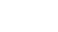

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210917-why-eating-colourful-food-is-good-for-you 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/weather 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business#skip-to-content 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/weather 
2021-09-21 16:46:49 [scrapy.spidermi

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58634106 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58634106/#comp-comments-button 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58637094 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58632681 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/business-58535299 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-58579833 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology-58625934 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBU

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/BBCWorld 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.facebook.com/bbcnews 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.instagram.com/bbcnews 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://pages.email.bbc.com/subscribe 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.com/news/10628994 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://twitter.com/BBC_HaveYourSay 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): http://www.bbc.co.uk/news/help-41670342 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business/your_money 
2021-09-2

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210629-south-americas-bitter-divide-over-a-toxic-covid-cure 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/tags/covid-19 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210705-how-children-are-spoofing-covid-19-tests-with-soft-drinks 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/article/20210614-covid-19-has-the-pandemic-harmed-our-memories 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/columns/medical-myths 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/future/tags/psychology 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.dept

2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/privacy/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies/ 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/guidance 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:49 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelin

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel/video/p09vhqkw/photographer-s-images-like-ghosts-coming-out-the-mist-#root 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?ptrt=https://www.bbc.com/reel 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel/video/p09vhqkw/photographer-s-images-like-ghosts-coming-out-the-mist- 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife/article/20210920-why-workers-might-eventually-reject-hybrid-work#orb-footer 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://se

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel#orb-footer 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://search.bbc.co.uk/search 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel/ 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel/longshots 
2021-09-21 16:46:50 [scrapy.spidermiddlewar

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-us-canada-58482593 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-us-canada-58154057 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-us-canada-57840797 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-europe-58629132 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-europe-58644980 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/world-asia-58636544 
2021-09-21 16:46:50 [scrapy.spidermiddl

2021-09-21 16:46:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/worklife/> (referer: None)
2021-09-21 16:46:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/sport/boxing/58639241> (referer: https://www.bbc.com/)
2021-09-21 16:46:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://www.bbc.com/sport/football> (referer: https://www.bbc.com/)
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/boxing#page 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/boxing 
2021-09

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-asia-58614108 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/boxing/58539196 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/boxing/58545296 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds/play/p09vmsj4 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/boxing/58505204 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds/series/p04v5n4p 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.b

2021-09-21 16:46:50 [second_spider] DEBUG: crawling: https://www.bbc.com/weather/2643743?day=3
2021-09-21 16:46:50 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/weather/2643743?day=3>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?&col=1&from=p&ptag=js&s=598253&p=unknown&x2=[responsive]&x3=[bbc_website]&x4=[en]&x8=[reverb-3.3.0-nojs]&x11=[weather_gnl]&x12=[weather]', 'https://weatherwatchers.files.bbci.co.uk/weatherwatchers/static/images/4a3ac464-cc52-4b9e-93e6-1366983acc8d/SMALL.jpg', 'https://weather.files.bbci.co.uk/weather-web-lambda-weather-watchers-renderer/43/images/pins/@2xautumn/sunny.png', 'https://weatherwatchers.files.bbci.co.uk/weatherwatchers/static/images/12f48992-7bca-4186-80c1-abd51c63a19a/SMALL.jpg', 'https://weather.files.bbci.co.uk/weather-web-lambda-weather-watchers-renderer/43/images/pins/@2xautumn/sunny-intervals.png', 'https://weatherwatchers.files.bbci.co.uk/weatherwatchers/static/images/5856d4ce-3615-4a97-a0af-f32360c2f429/SMALL.jpg', 
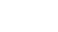

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/weather/2643743?day=2#orb-footer 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://search.bbc.co.uk/search 
2021-09-21 16:46:50 [scrapy.s

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/weather/2643743?day=3#orb-footer 
2021-09-21 16:46:50 [scrapy.sp

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEB

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bitesize 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/arts 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG

2021-09-21 16:46:50 [second_spider] DEBUG: crawling: https://www.bbc.com/sport/football
2021-09-21 16:46:50 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/sport/football>
{'image_urls': ['https://a1.api.bbc.co.uk/hit.xiti?&col=1&from=p&ptag=js&s=598253&p=football::sport.football.page&x1=[urn:bbc:cps:b5c53246-3b2a-e059-e040-850a02846523]&x2=[responsive]&x3=[bbc_website]&x4=[en]&x7=[index-home]&x8=[reverb-3.3.0-nojs]&x11=[SPORT_GNL]&x12=[SPORT]', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7', 'data:image/gif;base64,R0lGODlhAQABAIAA

2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://search.bbc.co.uk/search 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/all-sports 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/football 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/cricket 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/formula1 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/rugby-union 
2021-09-21 16:46:50 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/tennis 
2021-09-21 16:46:50 [scrap

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640388 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58623160 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58642139 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58634730 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58637116 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology-58469882 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58591095 
2021-09-21 16:46:51 [scrapy.spidermiddlewares

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/av/10462520 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/us_and_canada 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/technology 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/science_and_environment 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/stories 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/enterta

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-51768274 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/explainers-52544307 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-politics-58644422 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/correspondents/laurakuenssberg 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-58639895 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-58415046 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-politics-58633626 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/politics/parliaments 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/politics/uk_leaves_the_eu 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/education 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/schoolreport 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-12686570 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/disability 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.c

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/privacy/ 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies/ 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/guidance 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcnewsletter 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/editorialguidelines/guidance/feeds-and-links 
2021-09-21 16:46:51 [second_spider] DEBUG: crawling: https://www.bbc.com/sport/live/football/58122447
2021-09-21 16:46:51 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.bbc.com/sport/live/football/58122447>
{'i

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/reality_check 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world_radio_and_tv 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/newsbeat 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/the_reporters 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/can-i-share-things-from-the-bbc 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/world-us-canada-58322593 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/world-58396698 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ig

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58642139#main-heading 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account?lang=en-GB&ptrt=https://www.bbc.com/news/world-us-canada-58642139 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/reel 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/worklife 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth 

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-50068132 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628323 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/20039682 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/using
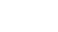

2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/darts 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/disability-sport 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/northern-ireland/gaelic-games 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/get-inspired 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/gymnastics 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/horse-racing 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/sport/mixed-martial-arts 
2021-09-21 16:46:51 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https:

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/weather 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignorin

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel#orb-footer 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://search.bbc.co.uk/search 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel/columns/travel-videos 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel/tags/20150312-video 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/travel/article/20210921-a-new-hope-for-a-historical-hospital 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring 
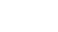

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/taster 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/localnews 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/bbcthree 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/#orb-footer 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://search.bbc.co.uk/search 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/tags/television 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/culture/article/20210920-foundation-

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe#skip-to-content 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/accessibility/ 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://account.bbc.com/account 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world/europe 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/weather 
2021-09-21 16:46:52 [scrapy.

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58620555 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-58637572 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-europe-58640387 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-58635137 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58628491 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-cornwall-58632372 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/england/cornwall 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignorin

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628323 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/20039682 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/terms/ 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/aboutthebbc 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/privacy/ 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/usingthebbc/cookies/ 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/guidance 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/contact 
20

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sport 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/weather 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/iplayer 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/sounds 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbbc 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/cbeebies 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/food 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignorin

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58628491 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-politics-58633626 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/correspondents/laurakuenssberg 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58637116 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58633515 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/world-us-canada-58591095 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/uk-england-cambridgeshire-58600935 
2021-09-21 16:46:52 [s

2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/politics/uk_leaves_the_eu 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/education 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/schoolreport 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/business-12686570 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.com/news/disability 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/10628994 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/news/help-50068132 
2021-09-21 16:46:52 [scrapy.spidermiddlewares.depth] DEBUG: Ignoring link (depth > 1): https://www.bbc.co.uk/

<Deferred at 0x7fa9abcc8fa0 current result: None>

In [2]:
from urllib.parse import urlparse

ITEM_PIPELINES = {
   RedisPipeline: 600,
}
process = CrawlerProcess({
    'USER_AGENT': "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/34.0.1847.131 Safari/537.36", 
    "ITEM_PIPELINES": ITEM_PIPELINES, 
    "DEPTH_LIMIT": 1}, 
)
start_urls = ['https://www.nytimes.com/ca/', 'https://www.bbc.com/']
allowed_domains = [urlparse(url).netloc for url in start_urls]
process.crawl(crawlImages, name = 'second_spider', start_urls = start_urls, allowed_domains=allowed_domains)
process.start()
process.join()

In [3]:
def check_result(urls):
    redis_client = redis.Redis(host='localhost', port=6379, db=0)
    result_json = {}
    for url in urls:
        key = 'result_'+url
        result=redis_client.lrange(key, 0, -1)
        result = list(dict.fromkeys([url.decode().split('?')[0] for url in result]))
        result_json[url] = result
    return result_json

{'https://www.nytimes.com/ca/': ['https://static01.nyt.com/images/2020/03/24/crosswords/vertex-nytgames-hi-res/vertex-nytgames-hi-res-square320-v5.png',
  'https://static01.nyt.com/images/2020/03/23/crosswords/tiles-logo-nytgames-hi-res/tiles-logo-nytgames-hi-res-square320-v4.png',
  'https://static01.nyt.com/images/2021/05/27/multimedia/alpha-letterboxed-promo-1622145789727/alpha-letterboxed-promo-1622145789727-square320.png',
  'https://static01.nyt.com/images/2021/08/03/crosswords/nyt-games-homepage-playmodule-subscribe/nyt-games-homepage-playmodule-subscribe-square320.png',
  'https://static01.nyt.com/images/2020/03/23/crosswords/crossword-logo-nytgames-hires/crossword-logo-nytgames-hires-square320-v3.png',
  'https://static01.nyt.com/images/2019/04/18/homepage/spelling-bee-logo-bulletin/spelling-bee-logo-bulletin-square320-v5.png',
  'https://static01.nyt.com/images/2021/09/20/smarter-living/wc-streaming-device-pic/wc-streaming-device-pic-threeByTwoSmallAt2X.jpg',
  'https://stati
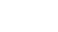

In [7]:
check_result(start_urls)

In [8]:
redis_client = redis.Redis(host='localhost', port=6379, db=0)
redis_client.flushdb()

True